In [1]:
# %load imports.txt
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../../../')

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Imports and constants

In [2]:
import os

from src.data_processing.load_data import load_iris
from src.experiments.config import get_config
from src.experiments.experiment import run
from src.settings import REPORT_DIR

PLOT_DIR = os.path.join(REPORT_DIR, 'figures')
NAME = 'iris'
DATA_LOADER_FUNC = load_iris

# Experiments

In [3]:
df, X, y = DATA_LOADER_FUNC(standardize=False)
config = get_config(n_neighbors=list(range(1, len(y))))
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [4]:
df_s, X_s, y_s = DATA_LOADER_FUNC(standardize=True)
df_s.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [5]:
history = run(X, y, config)

In [6]:
history_s = run(X_s, y_s, config)

In [7]:
df_history = pd.DataFrame.from_dict(history)
df_history.head()

N-splits RandomStates   Weight K-neighbors Minkowski-p   F1 mean    F1 std  \
0        5           30  uniform           1           2  0.956734  0.011552   
1        5           30  uniform           1         inf  0.960529  0.007810   
2        5           30  uniform           1           1  0.950478  0.012232   
3        5           30  uniform           2         inf  0.959504  0.008348   
4        5           30  uniform           2           2  0.947752  0.013408   

             F1  
0  95.7% ± 1.2%  
1  96.1% ± 0.8%  
2  95.0% ± 1.2%  
3  96.0% ± 0.8%  
4  94.8% ± 1.3%

In [8]:
df_history_s = pd.DataFrame.from_dict(history_s)
df_history_s.head()

N-splits RandomStates   Weight K-neighbors Minkowski-p   F1 mean    F1 std  \
0        5           30  uniform           1           2  0.944491  0.013408   
1        5           30  uniform           1         inf  0.945808  0.011651   
2        5           30  uniform           1           1  0.931625  0.013116   
3        5           30  uniform           2         inf  0.929078  0.009468   
4        5           30  uniform           2           2  0.940031  0.009332   

             F1  
0  94.4% ± 1.3%  
1  94.6% ± 1.2%  
2  93.2% ± 1.3%  
3  92.9% ± 0.9%  
4  94.0% ± 0.9%

In [9]:
df_history['Dataset'] = 'Original'
df_history_s['Dataset'] = 'Standardized'
df_results = pd.concat([df_history, df_history_s])


df_results['N-splits'] = pd.to_numeric(df_results['N-splits'])
df_results['RandomStates'] = pd.to_numeric(df_results['RandomStates'])
df_results['K-neighbors'] = pd.to_numeric(df_results['K-neighbors'])
df_results['F1 mean'] = pd.to_numeric(df_results['F1 mean'])
df_results['F1 std'] = pd.to_numeric(df_results['F1 std'])
df_results['Distance'] = df_results['Minkowski-p'].replace({'1': 'Manhattan',
                                                            '2': 'Euclidean',
                                                            'inf': 'Chebyshev'})

df_results

N-splits  RandomStates   Weight  K-neighbors Minkowski-p   F1 mean  \
0            5            30  uniform            1           2  0.956734   
1            5            30  uniform            1         inf  0.960529   
2            5            30  uniform            1           1  0.950478   
3            5            30  uniform            2         inf  0.959504   
4            5            30  uniform            2           2  0.947752   
...        ...           ...      ...          ...         ...       ...   
3424         9            30    gauss          132         inf  0.837708   
3425         9            30    gauss          132           2  0.898761   
3426         9            30    gauss          133           1  0.948458   
3427         9            30    gauss          133           2  0.898761   
3428         9            30    gauss          133         inf  0.837708   

        F1 std            F1       Dataset   Distance  
0     0.011552  95.7% ± 1.2%      Original  Euclidean  
1     0.007810  96.1% ± 0.8%      Original  Chebyshev  
2     0.012232  95.0% ± 1.2%      Original  Manhattan  
3     0.008348  96.0% ± 0.8%      Original  Chebyshev  
4     0.013408  94.8% ± 1.3%      Original  Euclidean  
...        ...           ...           ...        ...  
3424  0.018138  83.8% ± 1.8%  Standardized  Chebyshev  
3425  0.018787  89.9% ± 1.9%  Standardized  Euclidean  
3426  0.012835  94.8% ± 1.3%  Standardized  Manhattan  
3427  0.018787  89.9% ± 1.9%  Standardized  Euclidean  
3428  0.018138  83.8% ± 1.8%  Standardized  Chebyshev  

[6858 rows x 10 columns]

In [10]:
df_results['F1 up'] = df_results['F1 mean'] + df_results['F1 std']
df_results['F1 down'] = df_results['F1 mean'] - df_results['F1 std']
df_results

N-splits  RandomStates   Weight  K-neighbors Minkowski-p   F1 mean  \
0            5            30  uniform            1           2  0.956734   
1            5            30  uniform            1         inf  0.960529   
2            5            30  uniform            1           1  0.950478   
3            5            30  uniform            2         inf  0.959504   
4            5            30  uniform            2           2  0.947752   
...        ...           ...      ...          ...         ...       ...   
3424         9            30    gauss          132         inf  0.837708   
3425         9            30    gauss          132           2  0.898761   
3426         9            30    gauss          133           1  0.948458   
3427         9            30    gauss          133           2  0.898761   
3428         9            30    gauss          133         inf  0.837708   

        F1 std            F1       Dataset   Distance     F1 up   F1 down  
0     0.011552  95.7% ± 1.2%      Original  Euclidean  0.968287  0.945182  
1     0.007810  96.1% ± 0.8%      Original  Chebyshev  0.968339  0.952719  
2     0.012232  95.0% ± 1.2%      Original  Manhattan  0.962710  0.938247  
3     0.008348  96.0% ± 0.8%      Original  Chebyshev  0.967852  0.951156  
4     0.013408  94.8% ± 1.3%      Original  Euclidean  0.961160  0.934344  
...        ...           ...           ...        ...       ...       ...  
3424  0.018138  83.8% ± 1.8%  Standardized  Chebyshev  0.855846  0.819570  
3425  0.018787  89.9% ± 1.9%  Standardized  Euclidean  0.917548  0.879974  
3426  0.012835  94.8% ± 1.3%  Standardized  Manhattan  0.961293  0.935623  
3427  0.018787  89.9% ± 1.9%  Standardized  Euclidean  0.917548  0.879974  
3428  0.018138  83.8% ± 1.8%  Standardized  Chebyshev  0.855846  0.819570  

[6858 rows x 12 columns]

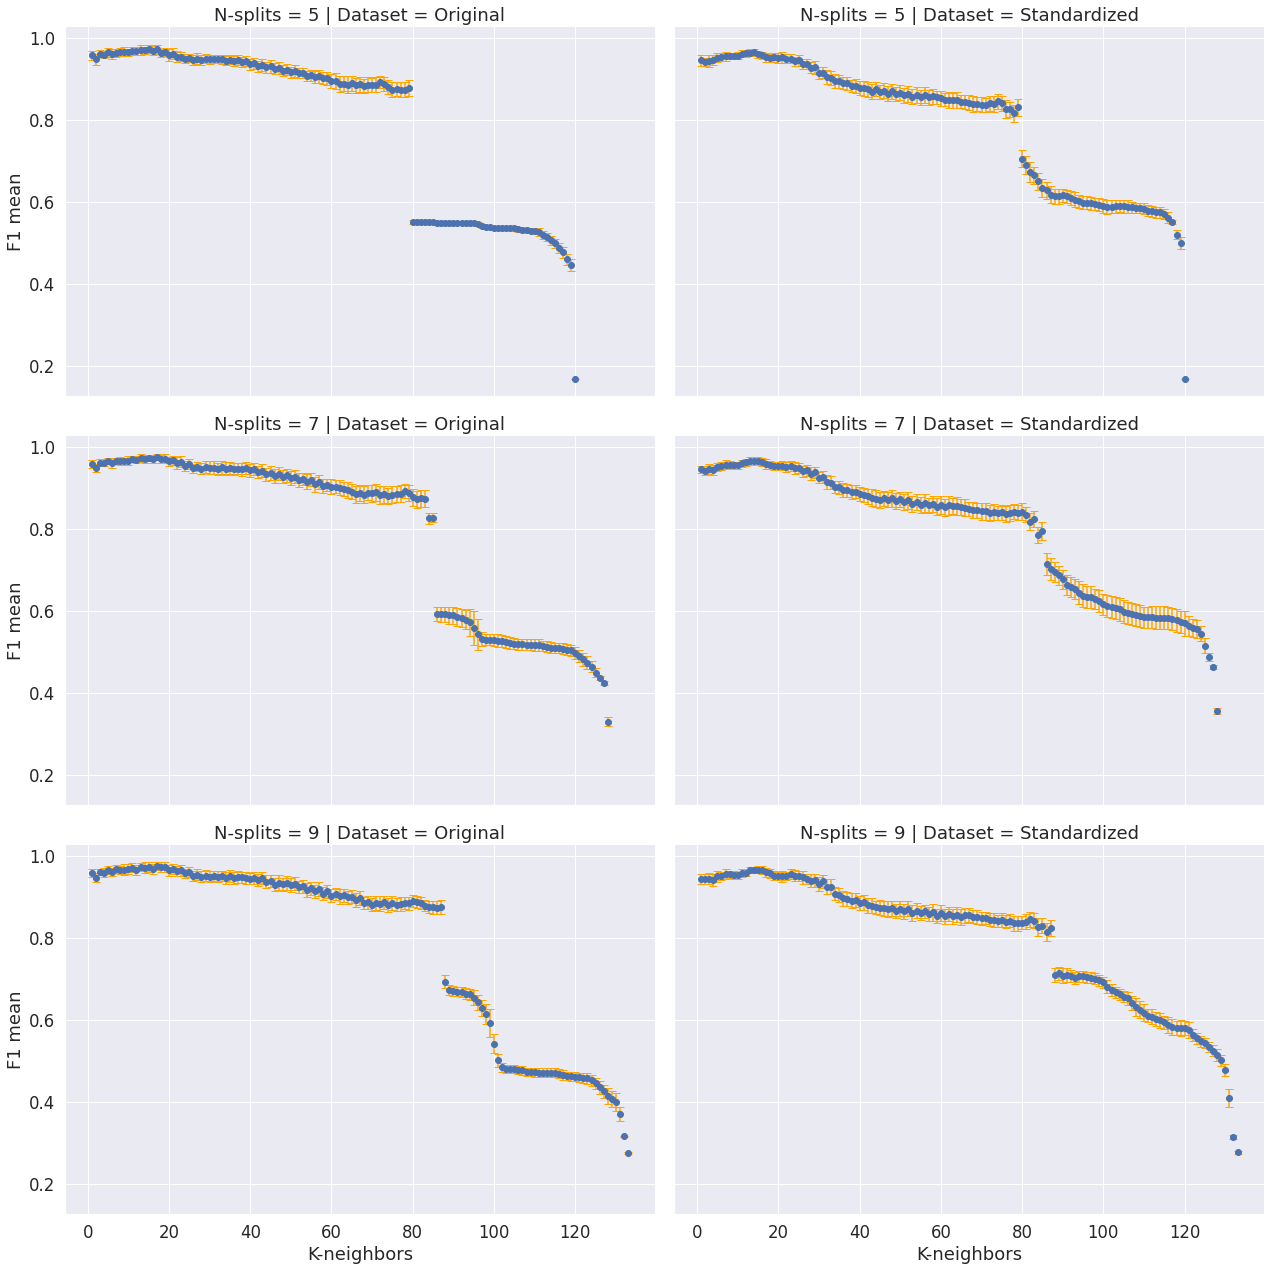

In [11]:
data = df_results[(df_results['Distance'] == 'Euclidean') 
                  & (df_results['Weight'] == 'uniform')]

sns.set(font_scale=1.5)
sns.set_style("darkgrid")
g = sns.FacetGrid(data, col="Dataset", row="N-splits", height=6, aspect=1.5)
g.set(xticks=np.arange(0, len(data), 20))
g.map(plt.errorbar, "K-neighbors", "F1 mean", "F1 std", capsize=4, ls='none', fmt='o', ecolor='orange')

plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_grid.png'), bbox_inches='tight')

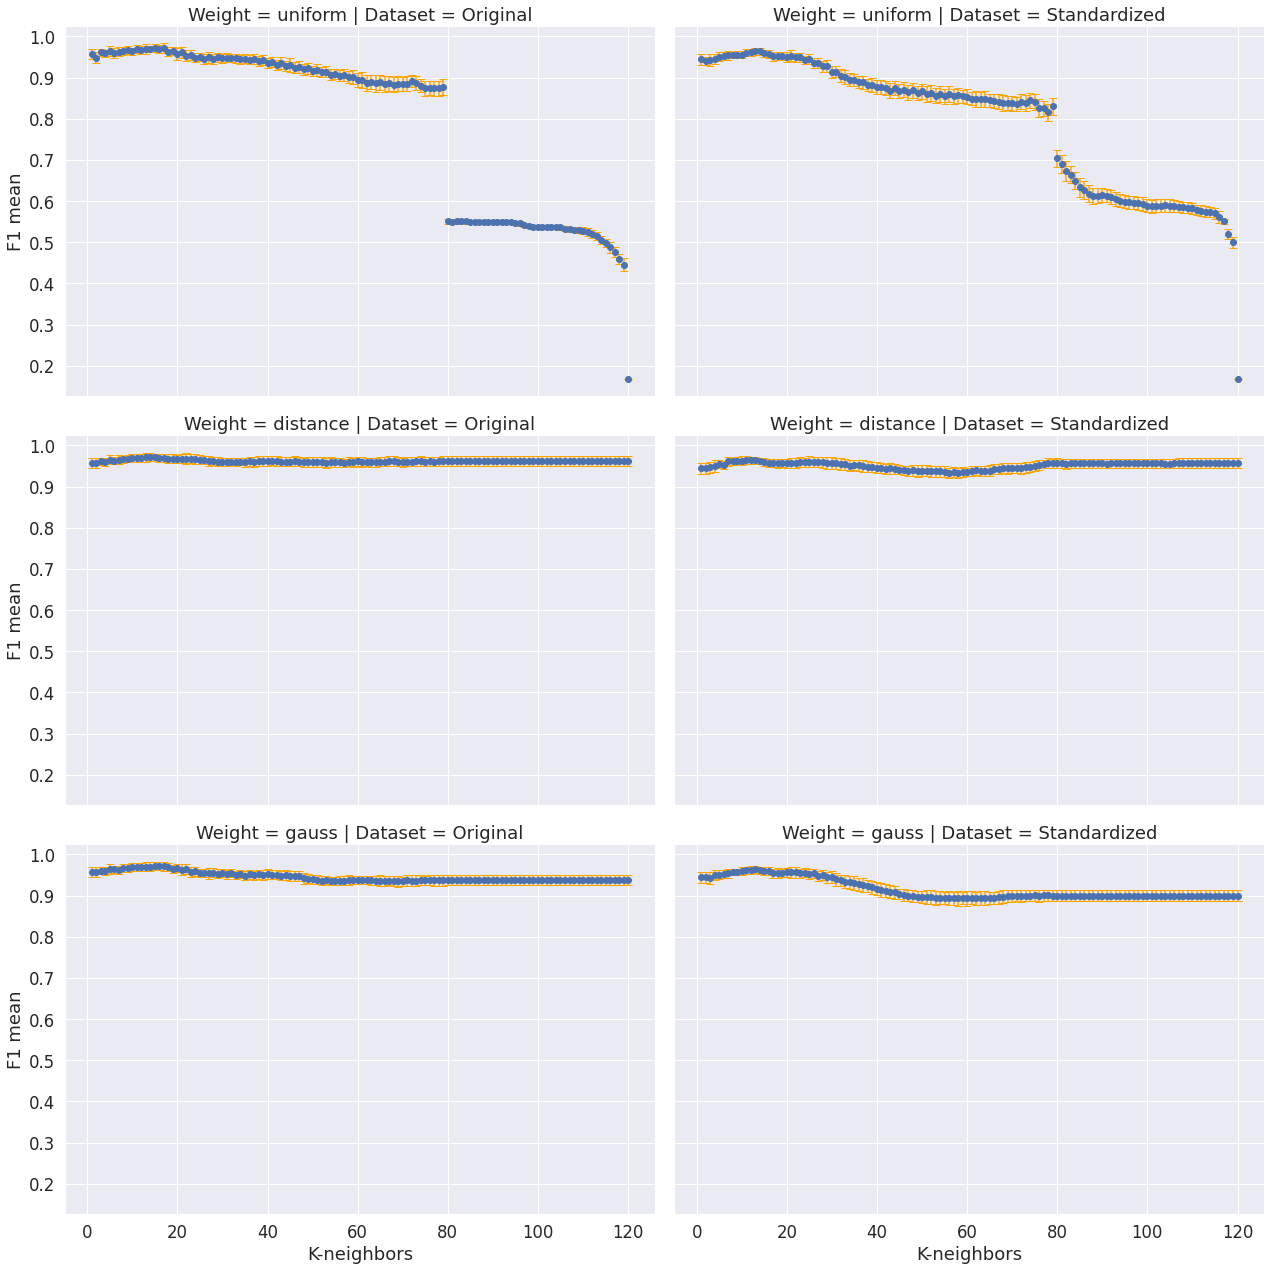

In [12]:
data_weight = df_results[(df_results['Distance'] == 'Euclidean') 
                         & (df_results['N-splits'] == 5)]

sns.set(font_scale=1.5)
sns.set_style("darkgrid")
g = sns.FacetGrid(data_weight, col="Dataset", row="Weight", height=6, aspect=1.5)
g.set(xticks=np.arange(0, len(data_weight), 20))
g.map(plt.errorbar, "K-neighbors", "F1 mean", "F1 std", capsize=4, ls='none', fmt='o', ecolor='orange')

plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_weight_grid.png'), bbox_inches='tight')

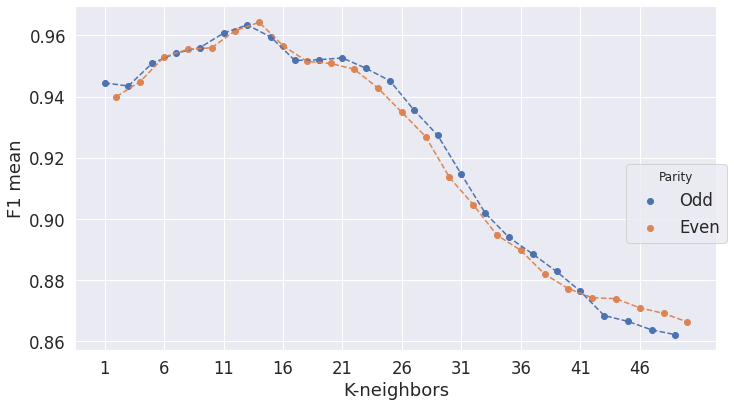

In [13]:
data_even_odd = df_results[(df_results['Distance'] == 'Euclidean') 
                         & (df_results['N-splits'] == 5) 
                         & (df_results['Dataset'] == 'Standardized') 
                         & (df_results['Weight'] == 'uniform')].copy()

data_even_odd = data_even_odd[data_even_odd['K-neighbors'] < 51]

data_even_odd['Parity'] = 'None'
data_even_odd.loc[data_even_odd['K-neighbors'] % 2 == 0, 'Parity'] = 'Even'
data_even_odd.loc[data_even_odd['K-neighbors'] % 2 == 1, 'Parity'] = 'Odd'


sns.set(font_scale=1.5)
sns.set_style("darkgrid")
g = sns.FacetGrid(data_even_odd, hue='Parity', height=6, aspect=1.5)
g.set(xticks=np.arange(1, len(data_even_odd), 5))
g.map(plt.scatter, "K-neighbors", "F1 mean").add_legend(frameon=True)
g.map(plt.plot, "K-neighbors", "F1 mean", linestyle='--')

plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_even_odd.png'), bbox_inches='tight')

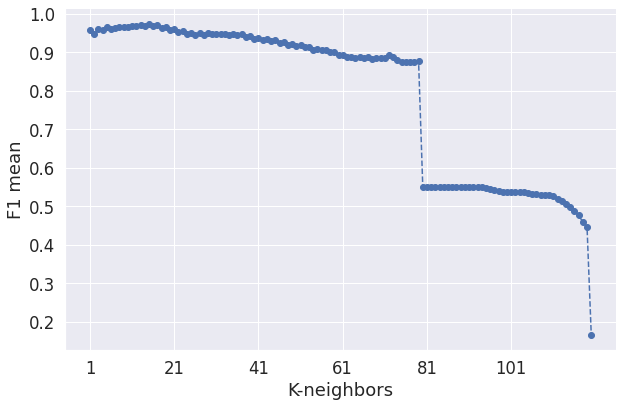

In [14]:
data_detail = df_results[(df_results['Distance'] == 'Euclidean') 
                         & (df_results['N-splits'] == 5) 
                         & (df_results['Dataset'] == 'Original') 
                         & (df_results['Weight'] == 'uniform')].copy()

sns.set(font_scale=1.5)
sns.set_style("darkgrid")
g = sns.FacetGrid(data_detail, height=6, aspect=1.5)
g.set(xticks=np.arange(1, len(data_detail), 20))
g.map(plt.scatter, "K-neighbors", "F1 mean")
g.map(plt.plot, "K-neighbors", "F1 mean", linestyle='--')

plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_detail.png'), bbox_inches='tight')

In [15]:
data_detail

N-splits  RandomStates   Weight  K-neighbors Minkowski-p   F1 mean  \
0           5            30  uniform            1           2  0.956734   
4           5            30  uniform            2           2  0.947752   
8           5            30  uniform            3           2  0.960976   
10          5            30  uniform            4           2  0.958501   
13          5            30  uniform            6           2  0.960218   
..        ...           ...      ...          ...         ...       ...   
346         5            30  uniform          116           2  0.487687   
350         5            30  uniform          117           2  0.476322   
352         5            30  uniform          118           2  0.459508   
356         5            30  uniform          119           2  0.445707   
361         5            30  uniform          120           2  0.166667   

       F1 std            F1   Dataset   Distance     F1 up   F1 down  
0    0.011552  95.7% ± 1.2%  Original  Euclidean  0.968287  0.945182  
4    0.013408  94.8% ± 1.3%  Original  Euclidean  0.961160  0.934344  
8    0.008201  96.1% ± 0.8%  Original  Euclidean  0.969177  0.952775  
10   0.007955  95.9% ± 0.8%  Original  Euclidean  0.966456  0.950545  
13   0.011664  96.0% ± 1.2%  Original  Euclidean  0.971882  0.948553  
..        ...           ...       ...        ...       ...       ...  
346  0.012712  48.8% ± 1.3%  Original  Euclidean  0.500399  0.474975  
350  0.013191  47.6% ± 1.3%  Original  Euclidean  0.489514  0.463131  
352  0.012838  46.0% ± 1.3%  Original  Euclidean  0.472346  0.446670  
356  0.015100  44.6% ± 1.5%  Original  Euclidean  0.460807  0.430607  
361  0.000000  16.7% ± 0.0%  Original  Euclidean  0.166667  0.166667  

[120 rows x 12 columns]

In [16]:
df_results[(df_results['F1 mean'] == df_results['F1 mean'].max())]

N-splits  RandomStates Weight  K-neighbors Minkowski-p   F1 mean  \
3052         9            30  gauss            8         inf  0.980864   

        F1 std            F1   Dataset   Distance     F1 up   F1 down  
3052  0.006341  98.1% ± 0.6%  Original  Chebyshev  0.987205  0.974523

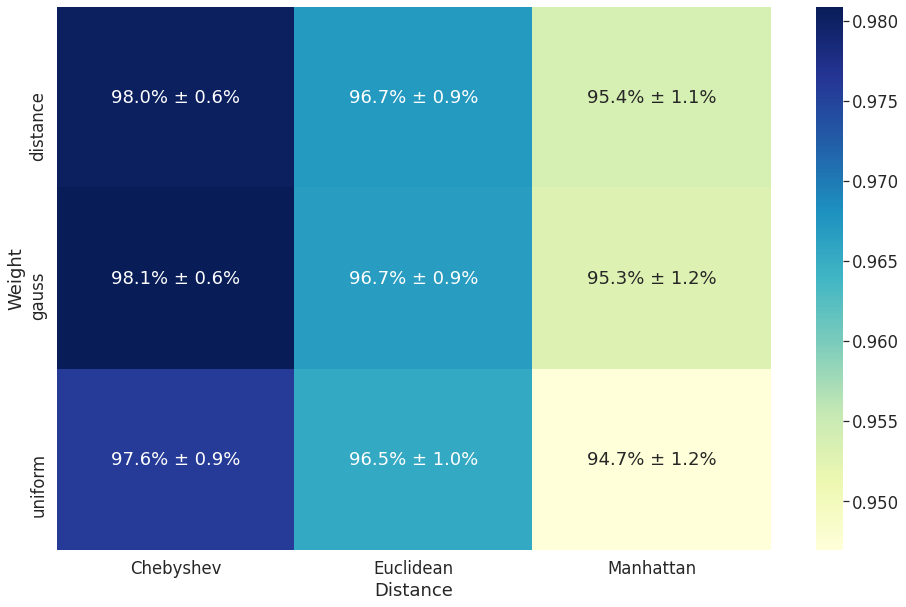

In [17]:
def plot_heatmap(df):
    temp = pd.DataFrame()
    temp['Weight'] = df['Weight']
    temp['Distance'] = df['Distance']
    temp['F1 mean'] = df['F1 mean']
    temp['Labels'] = df['F1']
    
    temp_data = temp.pivot(index='Weight', columns='Distance', values='F1 mean')
    temp_labels = temp.pivot(index='Weight', columns='Distance', values='Labels')

    plt.figure(figsize=(16, 10))
    sns.heatmap(temp_data, annot=temp_labels.to_numpy(), fmt='', cmap="YlGnBu")
    
    plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_heatmap.png'))

    
heatmap_data = df_results[(df_results['K-neighbors'] == 8) 
                          & (df_results['N-splits'] == 9)
                         & (df_results['Dataset'] == 'Original')]
plot_heatmap(heatmap_data)